# An Analysis into the Indian Start-up Ecosystem


## BUSINESS UNDERSTANDING

ODYSSEY Inc. is planning to enter the Indian startup ecosystem. As the data expert on the team, I am tasked with conducting an in-depth analysis of the ecosystem to determine the factors that influence the funding received by startups in India. The goal is to identify whether the location of these startups plays a significant role in the amount of funding they receive.

The analysis will focus on startup funding data spanning from 2018 to 2021. Separate datasets will be provided for each year, encompassing information about the startups, the funding amounts they received, and details about the investors involved. The primary objective is to investigate and understand whether the location of startups in India has a meaningful impact on the funding they secure.

This analysis will inform ODYSSEY Inc.'s strategic decisions and help us devise the most effective course of action within the Indian startup ecosystem.

#                                               HYPOTHESIS

H0: Receiving more funds by startups in India is independent of their location.

Ha: Receiving more funds by startups in India depends on their location.

# Business Question

1.	What is the trend in the amount of funding received by Indian startups over the years?
2.	Which sectors or industries received the highest amount of funding in India from 2018 to 2021?
3.	Do Startups in certain sectors tend to receive more funding than others based on their location
4.	What is the total funding amount received by Indian startups in different locations?
5.	What are the top 10 companies with the highest funding?
6.	What is the average amount of funds received by Indian startups at different stages of their life cycle?
7.	What are the startups that received the highest funding each year?
8.	Are there any patterns in the location of a company's headquarters and the amount of funding it receives?


# Importing Relevant Libraries

In [ ]:
! pip install pyodbc
! pip install plotly 
! pip install  scipy
! pip install python-dotenv
! pip install openpyxl

In [2]:
# Database Connection
import pyodbc

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Text Processing
import re

# Copying Objects
import copy

# Environment Variables
from dotenv import dotenv_values 

# Data Imputation
from sklearn.impute import SimpleImputer

# Handling Warning Messages
import warnings 
warnings.filterwarnings('ignore')

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick

# Statistical Analysis
from scipy import stats

# LOADING  DATA FROM SQL SOURCES

In [3]:
#PULLING VARIABLES from an environment
environment_variables = dotenv_values('.env')
 
database = environment_variables.get("database_name")
server = environment_variables.get("server_name")
username = environment_variables.get("Login")
password = environment_variables.get("password")
 
# defining a connection string for connecting to our SQL server datatbase
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# establish a database connection using the 'pyodbc' library
connection = pyodbc.connect(connection_string)


* 2020 Dataset

In [4]:
# SQL query to retrieve data from the 'LP1_startup_funding2020' table in a database
query2020 = "Select * from dbo.LP1_startup_funding2020"

# read the results of the SQL query into a DataFrame
df2020 = pd.read_sql(query2020, connection)

df2020=pd.DataFrame(df2020)

df2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


* 2021 Dataset

In [5]:
# SQL query to retrieve data from the 'LP1_startup_funding2021' table in a database
query2021 = "Select * from dbo.LP1_startup_funding2021"

# read the results of the SQL query into a DataFrame
df2021 = pd.read_sql(query2021, connection)

df2021 = pd.DataFrame(df2021)

df2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


# Loading CSV Data files

* 2019 Dataset

In [6]:
df2019 = pd.read_csv("startup_funding2019.CSV")

df2019=pd.DataFrame(df2019)

df2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


* 2018 Dataset

In [7]:
df2018 = pd.read_csv("startup_funding2018.CSV")

df2018=pd.DataFrame(df2018)

df2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


# DATA CLEANING & EDA

* 2020 Dataset

In [8]:
# Creating a copy of the dataset
df2020copy = copy.deepcopy(df2020)
df2020copy.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [9]:
# droping columns
columns_drop = ['Founders', 'Founded', 'Investor','column10']
df2020copy = df2020copy.drop(columns=columns_drop)

# add a year column in the data 
Year = [2020]*len(df2020copy)
df2020copy["Year"] = Year

# we rename specific columns
new_column_name = {'Company_Brand':'Company/Brand',
                  'What_it_does':'What it does' }
df2020copy = df2020copy.rename(columns=new_column_name) 

df2020copy.head()


,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,None,2020
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed,2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,NaN,Pre-seed,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,None,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,None,2020


In [10]:
# display information about the DataFrame
df2020copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1055 non-null   object 
 1   HeadQuarter    961 non-null    object 
 2   Sector         1042 non-null   object 
 3   What it does   1055 non-null   object 
 4   Amount         801 non-null    float64
 5   Stage          591 non-null    object 
 6   Year           1055 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 57.8+ KB


In [11]:
# Changing 'Year' column to datetime
df2020copy['Year'] = pd.to_datetime(df2020copy['Year'], format='%Y')

# Verifying the changes
print(df2020copy.dtypes)

Company/Brand            object
HeadQuarter              object
Sector                   object
What it does             object
Amount                  float64
Stage                    object
Year             datetime64[ns]
dtype: object


In [12]:
#Checking for NAN values
df2020copy.isnull().sum()

Company/Brand      0
HeadQuarter       94
Sector            13
What it does       0
Amount           254
Stage            464
Year               0
dtype: int64

In [13]:
df2020copy.describe()


,Amount,Year
count,8.010000e+02,1055
mean,1.130430e+08,2020-01-01 00:00:00
min,1.270000e+04,2020-01-01 00:00:00
25%,1.000000e+06,2020-01-01 00:00:00
50%,3.000000e+06,2020-01-01 00:00:00
75%,1.100000e+07,2020-01-01 00:00:00
max,7.000000e+10,2020-01-01 00:00:00
std,2.476635e+09,NaN


In [14]:
# display the Amount column only
df2020copy['Amount']

0         200000.0
1         100000.0
2              NaN
3         400000.0
4         340000.0
           ...    
1050     1500000.0
1051    13200000.0
1052     8000000.0
1053     8043000.0
1054     9000000.0
Name: Amount, Length: 1055, dtype: float64

In [15]:
# Select Amount column with null values
null_columns = ["Amount"]
 
# a SimpleImputer to fill null values wih median
imputer = SimpleImputer(strategy='median', fill_value = 'NaN')
 
# Apply the imputer to fill null values in selected columns
df2020copy[null_columns] = imputer.fit_transform(df2020copy[null_columns])

# verify changes
df2020copy.isnull().sum()

Company/Brand      0
HeadQuarter       94
Sector            13
What it does       0
Amount             0
Stage            464
Year               0
dtype: int64

In [16]:
# Previewing the HeadQuarter column of 2020 dataset
df2020copy['HeadQuarter']

0         Chennai
1       Bangalore
2            Pune
3       New Delhi
4          Indore
          ...    
1050        Delhi
1051         None
1052       Mumbai
1053        Delhi
1054      Chennai
Name: HeadQuarter, Length: 1055, dtype: object

In [17]:
#  Using the lamda function to extract the city names from the 'HeadQuarter' column
df2020copy['HeadQuarter'] = df2020copy['HeadQuarter'].apply(lambda x: x.split(',')[0].strip() if x is not None else None)

# Verify Changes
df2020copy['HeadQuarter'].unique

<bound method Series.unique of 0         Chennai
1       Bangalore
2            Pune
3       New Delhi
4          Indore
          ...    
1050        Delhi
1051         None
1052       Mumbai
1053        Delhi
1054      Chennai
Name: HeadQuarter, Length: 1055, dtype: object>

In [18]:
# Viewing the null values in the HeadQuarter column
missing_values = df2020copy[df2020copy['HeadQuarter'].isnull()]
missing_values

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
87,Habitat,None,EdTech,"Habitat, a social learning edtech platform for...",600000.0,Seed,2020-01-01
92,Raskik,None,Fusion beverages,All new fusion-flavour fruit juices with the g...,1000000.0,Pre-series A,2020-01-01
95,Pravasirojgar,None,Job portal,Initiative for blue-collar job workers,33000000.0,None,2020-01-01
121,Kaagaz Scanner,None,Scanning app,Kaagaz Scanner is the Indian replacement to ba...,575000.0,None,2020-01-01
487,Exprs,None,Nano Distribution Network,"Nano Distribution Centres, enabling seamless c...",5660000.0,None,2020-01-01
...,...,...,...,...,...,...,...
1035,Byju,None,Edtech,Provides online learning classes,200000000.0,None,2020-01-01
1041,Shiksha,None,Edtech,It makes college selection easy for students l...,181000.0,None,2020-01-01
1045,XpressBees,None,Logistics,Provides end to end supply chain solutions,10000000.0,None,2020-01-01
1047,Wealth Bucket,None,Fintech,An online platform for mutual fund investments,3000000.0,None,2020-01-01


In [19]:
# Replacing the null value with Not Available
df2020copy['HeadQuarter'].fillna('Not Available', inplace=True)

# Verify changes
df2020copy['HeadQuarter'].isnull().sum()

0

In [20]:
# Previewing the Sector column
df2020copy['Sector']

0                 AgriTech
1                   EdTech
2       Hygiene management
3                   Escrow
4                 AgriTech
               ...        
1050                Edtech
1051               Fintech
1052             Cosmetics
1053             Transport
1054              Logitech
Name: Sector, Length: 1055, dtype: object

In [21]:
# count the occurrences of each unique value in the 'Sector' column using 'value_counts'
df2020copy['Sector'].value_counts()

Sector
Fintech                  80
Edtech                   67
FinTech                  51
EdTech                   40
E-commerce               33
                         ..
Jewellery                 1
AR startup                1
HR Tech startup           1
Automotive Startup        1
Automobile Technology     1
Name: count, Length: 302, dtype: int64

In [22]:
# Convert all sector names to lowercase to ensure consistency as there are inconsistent spelling (e.g. FinTech and Fintech, EdTech and Edtech ).
df2020copy['Sector'] = df2020copy['Sector'].str.lower()

# Remove any leading and trailing whitespaces just incase from the sector names to handle variations caused by extra spaces
df2020copy['Sector'] = df2020copy['Sector'].str.strip()

# Verify changes by counting the occurrences of each unique value in the 'Sector' column using 'value_counts'
df2020copy['Sector'].value_counts()


Sector
fintech                  131
edtech                   107
healthtech                42
agritech                  38
e-commerce                33
                        ... 
jewellery                  1
ar startup                 1
hr tech startup            1
automotive startup         1
automobile technology      1
Name: count, Length: 285, dtype: int64

In [23]:
# Filter rows with NaN values in the 'Sector' column
df2020copy['Sector'].isna().value_counts()

Sector
False    1042
True       13
Name: count, dtype: int64

In [24]:
# Calculate the mode of the 'Sector' column
mode_sector = df2020copy['Sector'].mode()[0]

# Fill missing values in the 'Sector' column with the calculated mode because the column is categorical
df2020copy['Sector'].fillna(mode_sector, inplace=True)

# verify changes
df2020copy['Sector'].isna().value_counts()

Sector
False    1055
Name: count, dtype: int64

In [25]:
df2020copy['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [26]:
df2020copy['Stage'].value_counts()

Stage
Series A                 96
Seed                     80
Seed Round               69
Series B                 57
Pre series A             54
Pre-series A             53
Series C                 50
Series D                 22
Debt                     18
Pre Series A             12
Pre-seed                 11
Seed round                9
Series E                  6
Bridge                    6
Series F                  4
Pre-series B              4
Angel Round               4
Pre seed round            4
Pre-seed Round            2
Pre series B              2
Pre-Seed                  2
Seed Funding              2
Series B2                 2
Pre-series C              2
Seed funding              2
Pre-Series B              2
Seed Round & Series A     1
Series C, D               1
Mid series                1
Series D1                 1
Seed Investment           1
Pre series C              1
Pre-series                1
Bridge Round              1
Series H                  1
Seed A        

In [27]:
# Mapping stage column to in order to standardize variations like 'Pre series A', 'Pre-series A', and 'Pre Series A' to 'Pre-Series A'
stage_mapping = {
    'Series A': 'Series A',
    'Seed': 'Seed',
    'Seed Round': 'Seed',
    'Series B': 'Series B',
    'Pre series A': 'Pre-Series A',
    'Pre-series A': 'Pre-Series A',
    'Series C': 'Series C',
    'Series D': 'Series D',
    'Debt': 'Debt',
    'Pre Series A': 'Pre-Series A',
    'Pre-seed': 'Pre-Seed',
    'Seed round': 'Seed',
    'Series E': 'Series E',
    'Bridge': 'Bridge',
    'Series F': 'Series F',
    'Pre-series B': 'Pre-Series B',
    'Angel Round': 'Angel Round',
    'Pre seed round': 'Pre-Seed',
    'Pre-seed Round': 'Pre-Seed',
    'Pre series B': 'Pre-Series B',
    'Pre-Seed': 'Pre-Seed',
    'Seed Funding': 'Seed Funding',
    'Series B2': 'Series B',
    'Pre-series C': 'Pre-Series C',
    'Seed funding': 'Seed Funding',
    'Pre-Series B': 'Pre-Series B',
    'Seed Round & Series A': 'Seed',
    'Series C, D': 'Series C',
    'Mid series': 'Mid Series',
    'Series D1': 'Series D',
    'Seed Investment': 'Seed Funding',
    'Pre series C': 'Pre-Series C',
    'Pre-series': 'Pre-Series',
    'Bridge Round': 'Bridge',
    'Series H': 'Series H',
    'Seed A': 'Seed',
    'Pre- series A': 'Pre-Series A',
    'Series E2': 'Series E',
    'Pre series A1': 'Pre-Series A',
    'Edge': 'Edge',
    'Pre seed Round': 'Pre-Seed',
    'Series A-1': 'Series A'
}

# Apply the mapping to the 'Stage' column
df2020copy['Stage'] = df2020copy['Stage'].map(stage_mapping)



In [28]:
# verify changes by printing out the value_counts
df2020copy['Stage'].value_counts()

Stage
Seed            160
Pre-Series A    121
Series A         97
Series B         59
Series C         51
Series D         23
Pre-Seed         20
Debt             18
Pre-Series B      8
Series E          7
Bridge            7
Seed Funding      5
Series F          4
Angel Round       4
Pre-Series C      3
Pre-Series        1
Edge              1
Series H          1
Mid Series        1
Name: count, dtype: int64

In [29]:
# Checking for null values in the stage column
df2020copy['Stage'].isnull

<bound method Series.isnull of 0            NaN
1       Pre-Seed
2       Pre-Seed
3            NaN
4            NaN
          ...   
1050         NaN
1051        Seed
1052         NaN
1053    Series C
1054    Series A
Name: Stage, Length: 1055, dtype: object>

In [30]:
# previewing the datatype of the stage column
print(df2020copy['Stage'].dtype)

object


In [31]:
# Previewing the unique values
print(df2020copy['Stage'].unique())


[nan 'Pre-Seed' 'Seed' 'Pre-Series A' 'Pre-Series' 'Series C' 'Series A'
 'Series B' 'Debt' 'Pre-Series C' 'Pre-Series B' 'Series E' 'Bridge'
 'Series D' 'Series F' 'Edge' 'Series H' 'Seed Funding' 'Angel Round'
 'Mid Series']


In [32]:
# Replace NaN with the most frequent value
most_frequent_stage = df2020copy['Stage'].mode()[0]
df2020copy['Stage'] = df2020copy['Stage'].replace(np.nan, most_frequent_stage)

# Verify the changes
df2020copy['Stage'].isnull().sum()


0

In [33]:
# Checking for null values in the 2020 dataset
df2020copy.isnull().sum()

Company/Brand    0
HeadQuarter      0
Sector           0
What it does     0
Amount           0
Stage            0
Year             0
dtype: int64

* 2021 Dataset

In [34]:
# Creating a copy of the dataset
df2021copy = copy.deepcopy(df2021)
df2021copy.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [35]:
# cleaning the 2021 data: we are to add year column and drop specific columns.

## droping columns
columns_drop = ['Founders', 'Founded', 'Investor']
df2021copy = df2021copy.drop(columns=columns_drop)

# add a year column in the data 
Year = [2021]*len(df2021copy)
df2021copy["Year"] = Year

# we rename specific columns
new_column_name = {'Company_Brand':'Company/Brand',
                  'What_it_does':'What it does' }
df2021copy = df2021copy.rename(columns=new_column_name) 

df2021copy.head()

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"$1,200,000",Pre-series A,2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"$120,000,000",None,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"$30,000,000",Series D,2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"$51,000,000",Series C,2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...","$2,000,000",Seed,2021


In [36]:
df2021copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1209 non-null   object
 1   HeadQuarter    1208 non-null   object
 2   Sector         1209 non-null   object
 3   What it does   1209 non-null   object
 4   Amount         1206 non-null   object
 5   Stage          781 non-null    object
 6   Year           1209 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 66.2+ KB


In [37]:
# Changing 'Year' column to datetime
df2021copy['Year'] = pd.to_datetime(df2021copy['Year'], format='%Y')

# Verifying the changes
print(df2021copy.dtypes)

Company/Brand            object
HeadQuarter              object
Sector                   object
What it does             object
Amount                   object
Stage                    object
Year             datetime64[ns]
dtype: object


In [38]:
#Checking for NAN values
df2021copy.isnull().sum()

Company/Brand      0
HeadQuarter        1
Sector             0
What it does       0
Amount             3
Stage            428
Year               0
dtype: int64

In [39]:
# Cleaning the 'Amount' column by removing commas and currency symbols
df2021copy['Amount'] = pd.to_numeric(df2021copy['Amount'].replace('[\$,]', '', regex=True), errors='coerce')

# Calculate the median of the 'Amount' column
median = df2021copy['Amount'].median()

# Fill missing values in the 'Amount' column with the calculated median
df2021copy['Amount'].fillna(median, inplace=True)

# Checking the results
df2021copy.isnull().sum()

Company/Brand      0
HeadQuarter        1
Sector             0
What it does       0
Amount             0
Stage            428
Year               0
dtype: int64

In [40]:
# pre-viewing the unique enteries for the HaedQuarter column
df2021copy['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [41]:
# Replace/correct specific entries (e.g There is no place called 'Small towns')
df2021copy['HeadQuarter'] = df2021copy['HeadQuarter'].replace({
    'Small Towns, Andhra Pradesh': 'Andhra Pradesh',
    'Gurugram\t#REF!': 'Gurugram'
})

In [42]:
# split HeadQuarter into list and get first item (This helps to handle Faridabad, Haryana and Mountain view, CA)
df2021copy['HeadQuarter'] = df2021copy['HeadQuarter'].str.split(',').str[0]


In [43]:
# remove unwanted enteries in the HeadQuarter column
unwanted_values = ['Computer Games',
                   'Pharmaceuticals\t#REF!',
                   'Food & Beverages',
                   'Information Technology & Services',
                   'Online Media\t#REF!',]
df2021copy = df2021copy[~df2021copy['HeadQuarter'].isin(unwanted_values)]

# Remove unwanted characters or whitespace
df2021copy['HeadQuarter'] = df2021copy['HeadQuarter'].str.strip()

# Verify the changes
print(df2021copy['HeadQuarter'].unique())

['Bangalore' 'Mumbai' 'Gurugram' 'New Delhi' 'Hyderabad' 'Jaipur'
 'Ahmadabad' 'Chennai' None 'Andhra Pradesh' 'Goa' 'Rajsamand' 'Ranchi'
 'Faridabad' 'Gujarat' 'Pune' 'Thane' 'Cochin' 'Noida' 'Chandigarh'
 'Gurgaon' 'Vadodara' 'Kolkata' 'Ahmedabad' 'Mohali' 'Haryana' 'Indore'
 'Powai' 'Ghaziabad' 'Nagpur' 'West Bengal' 'Patna' 'Samsitpur' 'Lucknow'
 'Telangana' 'Silvassa' 'Thiruvananthapuram' 'Roorkee' 'Ambernath'
 'Panchkula' 'Surat' 'Coimbatore' 'Andheri' 'Mangalore' 'Telugana'
 'Bhubaneswar' 'Kottayam' 'Beijing' 'Panaji' 'Satara' 'Orissia' 'Jodhpur'
 'New York' 'Santra' 'Mountain View' 'Trivandrum' 'Jharkhand' 'Kanpur'
 'Bhilwara' 'Guwahati' 'Kochi' 'London' 'The Nilgiris' 'Gandhinagar']


In [44]:
# Replacing the null value with Not Available
df2021copy['HeadQuarter'].fillna('Not Available', inplace=True)

# Verify changes
df2021copy['HeadQuarter'].isnull().sum()

0

In [45]:
# Previewing the Sector column
df2021copy['Sector']


0                  AI startup
1                      EdTech
2                      EdTech
3              B2B E-commerce
4                     FinTech
                ...          
1204    Staffing & Recruiting
1205         Food & Beverages
1206       Financial Services
1207                   EdTech
1208       Financial Services
Name: Sector, Length: 1201, dtype: object

In [46]:
# Convert all sector names to lowercase to ensure consistency as there are inconsistent spelling (e.g. FinTech and Fintech, EdTech and Edtech ).
df2021copy['Sector'] = df2021copy['Sector'].str.lower()

# Remove any leading and trailing whitespaces just incase from the sector names to handle variations caused by extra spaces
df2021copy['Sector'] = df2021copy['Sector'].str.strip()


In [47]:
# checking the unique entires in the stage column
df2021copy['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [48]:
# checking the frequency of the unique entries
df2021copy['Stage'].value_counts()

Stage
Seed             244
Pre-series A     157
Series A         126
Series B          49
Pre-seed          47
Series C          44
Debt              27
Series D          21
Series E          18
Pre-series B      10
Series F           6
Pre-series A1      4
Series G           2
Bridge             2
Series H           2
Pre-series         2
$300000            2
Series D1          1
Series A2          1
Seies A            1
$1000000           1
$6000000           1
Seed+              1
Early seed         1
Series F2          1
Series F1          1
PE                 1
Series B3          1
Series A+          1
Series I           1
Name: count, dtype: int64

In [49]:
# Standardize stage column to suit prevoius stage mapping done on the 2020 data set 
df2021copy['Stage'] = df2021copy['Stage'].replace({
    'Pre-series A1': 'Pre-Series A',
    'Pre-series A': 'Pre-Series A',
    'Pre-series B': 'Pre-Series B',
    'Pre-seed': 'Pre-Seed',
    'Seed+': 'Seed',
    'Pre-series': 'Pre-Series',
    'Seies A': 'Series A',
    'Series A2': 'Series A',
    'Early seed': 'Seed',
    'Series F1': 'Series F',
    'Series F2': 'Series F',
    'Series B3': 'Series B',
    'Series A+': 'Series A',
    'Series D1': 'Series D',
})

# Remove unclear entries, handling None values
df2021copy = df2021copy[~df2021copy['Stage'].astype(str).str.contains(r'^\$', regex=True, na=False)]

# Verify changes
df2021copy['Stage'].unique()

array(['Pre-Series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-Seed', 'Series A', 'Pre-Series B', 'Debt',
       'Bridge', 'Series F', 'Series G', 'Series H', 'PE', 'Pre-Series',
       'Series I'], dtype=object)

In [50]:
# Checking the frequency of the unique values
df2021copy['Stage'].value_counts()

Stage
Seed            246
Pre-Series A    161
Series A        129
Series B         50
Pre-Seed         47
Series C         44
Debt             27
Series D         22
Series E         18
Pre-Series B     10
Series F          8
Bridge            2
Series G          2
Series H          2
Pre-Series        2
PE                1
Series I          1
Name: count, dtype: int64

In [51]:
# viewing the total number of null values 
df2021copy['Stage'].isnull().sum()

425

In [52]:
# viewing the datatype of the stage column
print(df2021copy['Stage'].dtype)


object


In [53]:
# Replace NaN with the most frequent value
most_frequent_stage = df2021copy['Stage'].mode()[0]
df2021copy['Stage'] = df2021copy['Stage'].replace(np.nan, most_frequent_stage)

# Verify the changes
df2021copy['Stage'].isnull().sum()


0

In [54]:
# Checking for null values in the 2020 dataset
df2021copy.isnull().sum()


Company/Brand    0
HeadQuarter      0
Sector           0
What it does     0
Amount           0
Stage            0
Year             0
dtype: int64

In [55]:
# Viewing the shape of the data frame
df2021copy.shape

(1197, 7)

* 2019 Dataset

In [56]:
# Renaming the 2019 dataset
df2019copy = df2019
df2019copy.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [57]:
# cleaning the 2019 data: we are to add year column and drop specific columns.

## droping columns
columns_drop = ['Founders', 'Founded', 'Investor']
df2019copy = df2019copy.drop(columns=columns_drop)

# add the year column to the dataframe 
Year = [2019]*len(df2019copy)
df2019copy["Year"] = Year

df2019copy.head()

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Stage,Year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,"$6,300,000",NaN,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,"$150,000,000",Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,"$28,000,000",Fresh funding,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",Series D,2019
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",NaN,2019


In [58]:
# rename 'Amount($)' column to 'Amount' to suit the column header of 2020 and 20211 dataset
new_column_name = {'Amount($)':'Amount'}
df2019copy = df2019copy.rename(columns=new_column_name)

df2019copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  89 non-null     object
 1   HeadQuarter    70 non-null     object
 2   Sector         84 non-null     object
 3   What it does   89 non-null     object
 4   Amount         89 non-null     object
 5   Stage          43 non-null     object
 6   Year           89 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 5.0+ KB


In [59]:
# Changing 'Year' column to datetime
df2019copy['Year'] = pd.to_datetime(df2019copy['Year'], format='%Y')

# Verifying the changes
print(df2019copy.dtypes)

Company/Brand            object
HeadQuarter              object
Sector                   object
What it does             object
Amount                   object
Stage                    object
Year             datetime64[ns]
dtype: object


In [60]:
# Remove dollar signs and commas from the "Amount" column
df2019copy['Amount'] = df2019copy['Amount'].str.replace('[\$,]', '', regex=True)

# Convert the "Amount" column numeric values
df2019copy['Amount'] = pd.to_numeric(df2019copy['Amount'], errors='coerce', downcast='integer')

# Verify the changes
print(df2019copy.dtypes)



Company/Brand            object
HeadQuarter              object
Sector                   object
What it does             object
Amount                  float64
Stage                    object
Year             datetime64[ns]
dtype: object


In [61]:
#Checking for NAN values
df2019copy.isnull().sum()

Company/Brand     0
HeadQuarter      19
Sector            5
What it does      0
Amount           12
Stage            46
Year              0
dtype: int64

In [62]:
# Select Amount columns with null values
null_columns = ["Amount"]
 
# a SimpleImputer to fill null values wih median
imputer = SimpleImputer(strategy='median', fill_value = 'NaN')
 
# Apply the imputer to fill null values in selected columns
df2019copy[null_columns] = imputer.fit_transform(df2019copy[null_columns])

df2019copy.isnull().sum()

Company/Brand     0
HeadQuarter      19
Sector            5
What it does      0
Amount            0
Stage            46
Year              0
dtype: int64

In [63]:
# Previewing the HeadQuarter column of 2019 dataset
df2019copy['HeadQuarter']

0           NaN
1        Mumbai
2        Mumbai
3       Chennai
4     Telangana
        ...    
84       Mumbai
85     Gurugram
86        Delhi
87        Delhi
88    Rajasthan
Name: HeadQuarter, Length: 89, dtype: object

In [64]:
# Replacing the null value with Not Available
df2019copy['HeadQuarter'].fillna('Not Available', inplace=True)

# Verify changes
df2019copy['HeadQuarter'].isnull().sum()


0

In [65]:
# Previewing the Sector column of 2019 dataset
df2019copy['Sector']

0                   Ecommerce
1                      Edtech
2                      Edtech
3             Interior design
4                    AgriTech
               ...           
84                  Infratech
85                Hospitality
86    Automobile & Technology
87                 Automobile
88                    Banking
Name: Sector, Length: 89, dtype: object

In [66]:
# count the occurrences of each unique value in the 'Sector' column using 'value_counts'
df2019copy['Sector'].value_counts()


Sector
Edtech                          7
Fintech                         5
AgriTech                        4
Technology                      4
SaaS                            4
Automobile                      3
E-commerce                      3
Logistics                       3
Food                            2
Foodtech                        2
Accomodation                    2
Automotive tech                 2
IoT                             2
AI                              2
E-marketplace                   2
Ecommerce                       1
Cybersecurity                   1
Mutual Funds                    1
Food & tech                     1
Legal tech                      1
Sports                          1
B2B Supply Chain                1
Healthtech                      1
Yoga & wellness                 1
Virtual Banking                 1
Transportation                  1
Transport & Rentals             1
Marketing & Customer loyalty    1
Infratech                       1
Hospita

In [67]:
# Convert all sector names to lowercase to ensure consistency as there are inconsistent spelling (e.g. FinTech and Fintech, EdTech and Edtech ).
df2019copy['Sector'] = df2019copy['Sector'].str.lower()

# Remove any leading and trailing whitespaces just incase from the sector names to handle variations caused by extra spaces
df2019copy['Sector'] = df2019copy['Sector'].str.strip()

# Verify changes by counting the occurrences of each unique value in the 'Sector' column using 'value_counts'
df2019copy['Sector'].value_counts()


Sector
edtech                          7
fintech                         5
agritech                        4
technology                      4
saas                            4
automobile                      3
e-commerce                      3
logistics                       3
food                            2
foodtech                        2
accomodation                    2
automotive tech                 2
iot                             2
ai                              2
e-marketplace                   2
ecommerce                       1
cybersecurity                   1
mutual funds                    1
food & tech                     1
legal tech                      1
sports                          1
b2b supply chain                1
healthtech                      1
yoga & wellness                 1
virtual banking                 1
transportation                  1
transport & rentals             1
marketing & customer loyalty    1
infratech                       1
hospita

In [68]:
# Filter rows with NaN values in the 'Sector' column
df2019copy['Sector'].isna().value_counts()


Sector
False    84
True      5
Name: count, dtype: int64

In [69]:
# Calculate the mode of the 'Sector' column
mode_sector = df2019copy['Sector'].mode()[0]

# Fill missing values in the 'Sector' column with the calculated mode because the column is categorical
df2019copy['Sector'].fillna(mode_sector, inplace=True)

# verify changes
df2019copy['Sector'].isna().value_counts()


Sector
False    89
Name: count, dtype: int64

In [70]:
# Viewing the stage column
df2021copy['Stage']

0       Pre-Series A
1               Seed
2           Series D
3           Series C
4               Seed
            ...     
1204    Pre-Series A
1205        Series D
1206        Series C
1207        Series B
1208        Series A
Name: Stage, Length: 1197, dtype: object

In [71]:
# checking the unique entires in the stage column
df2021copy['Stage'].unique()


array(['Pre-Series A', 'Seed', 'Series D', 'Series C', 'Series B',
       'Series E', 'Pre-Seed', 'Series A', 'Pre-Series B', 'Debt',
       'Bridge', 'Series F', 'Series G', 'Series H', 'PE', 'Pre-Series',
       'Series I'], dtype=object)

In [72]:
# checking the frequency of the unique entires
df2019copy['Stage'].value_counts()


Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [73]:
# viewing the total number of null values 
df2019copy['Stage'].isnull().sum()


46

In [74]:
# Replace NaN with the most frequent value
most_frequent_stage = df2019copy['Stage'].mode()[0]
df2019copy['Stage'] = df2019copy['Stage'].replace(np.nan, most_frequent_stage)

# Verify the changes
df2019copy['Stage'].isnull().sum()


0

In [75]:
# Checking for null values in the 2020 dataset
df2019copy.isnull().sum()


Company/Brand    0
HeadQuarter      0
Sector           0
What it does     0
Amount           0
Stage            0
Year             0
dtype: int64

* 2018 Dataset

In [76]:
# renaming the 2018 dataset
df2018copy = df2018
df2018copy.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [77]:
# create a column haeder (Year) and populate it with the year '2018'
Year = [2018] * len(df2018copy)

df2018copy['Year'] = Year

df2018copy.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [78]:
# Changing 'Year' column to datetime datatype
df2018copy['Year'] = pd.to_datetime(df2018copy['Year'], format='%Y')

# Verifying the changes
print(df2018copy.dtypes)

Company Name             object
Industry                 object
Round/Series             object
Amount                   object
Location                 object
About Company            object
Year             datetime64[ns]
dtype: object


In [79]:
# Renaming specific columns names based on a predefined mapping of column names of other datasets (2019, 2020 and 2021)
new_column_names = {
    'Company Name': 'Company/Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Location': 'HeadQuarter',
    'About Company': 'What it does'
}

# Rename the columns
df2018copy = df2018copy.rename(columns=new_column_names)

# Verify changes whilst checking the information on the dataset
df2018copy.head()

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018-01-01
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018-01-01
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018-01-01
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018-01-01


In [80]:
# replace/remove commas
df2018copy['Amount'] = df2018copy['Amount'].replace(',', '', regex=True)

# Using a function to extract currency symbol in the amount column
def extract_currency(amount):
    currencies = ['₹', '$']
    for currency in currencies:
        if currency in amount:
            return currency
    return None

# Extract currency symbols
df2018copy['Currency'] = df2018copy['Amount'].apply(extract_currency)

# Define exchange rate for Rupees to Dollars (The average INR/USD exchange rate for 2018 is 0.01461 US Dollars per Indian Rupee.)
rupees_to_dollars_rate = 0.01461 

# Convert to numeric, considering currency
df2018copy['Amount'] = pd.to_numeric(df2018copy['Amount'].replace('[\₹,$]', '', regex=True), errors='coerce')
df2018copy['Amount'] = df2018copy.apply(lambda row: row['Amount'] * rupees_to_dollars_rate if row['Currency'] == '₹' else row['Amount'], axis=1)

# Drop the 'Currency' column
df2018copy = df2018copy.drop(columns=['Currency'])

#Verify Changes
df2018copy.head()

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584400.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018-01-01
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949650.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018-01-01
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018-01-01
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018-01-01


In [81]:
# Checking for Null Values
df2018copy.isnull().sum()

Company/Brand      0
Sector             0
Stage              0
Amount           148
HeadQuarter        0
What it does       0
Year               0
dtype: int64

In [82]:
# carrying out a summary statistics
df2018copy.describe()

,Amount,Year
count,3.780000e+02,526
mean,1.757308e+07,2018-01-01 00:00:00
min,8.766000e+02,2018-01-01 00:00:00
25%,5.000000e+05,2018-01-01 00:00:00
50%,1.300000e+06,2018-01-01 00:00:00
75%,5.000000e+06,2018-01-01 00:00:00
max,1.000000e+09,2018-01-01 00:00:00
std,7.787738e+07,NaN


In [83]:
# Select Amount columns with null values
null_columns = ["Amount"]
 
# a SimpleImputer to fill null values wih median
imputer = SimpleImputer(strategy='median', fill_value = 'NaN')
 
# Apply the imputer to fill null values in selected columns
df2018copy[null_columns] = imputer.fit_transform(df2018copy[null_columns])

# verifying changes
df2018copy.isnull().sum()

Company/Brand    0
Sector           0
Stage            0
Amount           0
HeadQuarter      0
What it does     0
Year             0
dtype: int64

In [84]:
# Pre-viewing the unique entries for the HeadQuarter column
df2018copy['HeadQuarter'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [85]:
# split HeadQuarter into list and get first item (the city)
df2018copy['HeadQuarter'] = df2018copy['HeadQuarter'].str.split(',').str[0]

# verify result 
df2018copy['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [86]:
# replace any occurrence of 'Bangalore City' in the 'HeadQuarter' column with 'Bangalore'
df2018copy['HeadQuarter'] = df2018copy['HeadQuarter'].replace({
    'Bangalore City': 'Bangalore'
})
# verify result 
df2018copy['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar',
       'Kannur', 'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow'], dtype=object)

In [87]:
# Pre-viewing the unique Sector column
df2018copy['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [88]:
# split Sector into list and get first item representing the sector name
df2018copy['Sector'] = df2018copy['Sector'].str.split(',').str[0]
 
# verify result 
df2018copy['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       '—', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [89]:
# Checking the value counts of the sector column
df2018copy['Sector'].value_counts()

Sector
—                                     30
Financial Services                    26
Health Care                           26
E-Commerce                            22
Apps                                  20
                                      ..
Business Intelligence                  1
Government                             1
Audio                                  1
Enterprise Resource Planning (ERP)     1
Eyewear                                1
Name: count, Length: 148, dtype: int64

In [90]:
# Convert all sector names to lowercase to ensure consistency with other dataset
df2018copy['Sector'] = df2018copy['Sector'].str.lower()

# Remove any leading and trailing whitespaces just incase from the sector names to handle variations caused by extra spaces
df2018copy['Sector'] = df2018copy['Sector'].str.strip()

# Verify changes by counting the occurrences of each unique value in the 'Sector' column using 'value_counts'
df2018copy['Sector'].value_counts()


Sector
—                                     30
financial services                    26
health care                           26
e-commerce                            22
apps                                  20
                                      ..
business intelligence                  1
government                             1
audio                                  1
enterprise resource planning (erp)     1
eyewear                                1
Name: count, Length: 148, dtype: int64

In [91]:
# Replace '-' in the sector column with NaN beacuse it is unidentified data.
df2018copy['Sector'] = df2018copy['Sector'].replace('—', np.nan)

# Verify changes
df2018copy['Sector'].isnull().value_counts()

Sector
False    496
True      30
Name: count, dtype: int64

In [92]:
# then replace the 'NaN' with the most frequent value in the column
most_frequent_stage = df2018copy['Sector'].mode()[0]
df2018copy['Sector'] = df2018copy['Sector'].replace(np.nan, most_frequent_stage)

# Verify changes by counting the occurrences of each unique value in the 'Sector' column using 'value_counts'
df2018copy['Sector'].value_counts()

Sector
financial services                    56
health care                           26
e-commerce                            22
apps                                  20
finance                               18
                                      ..
business intelligence                  1
government                             1
audio                                  1
enterprise resource planning (erp)     1
eyewear                                1
Name: count, Length: 147, dtype: int64

In [93]:
# Checking the value counts of the Stage column
df2018copy['Stage'].value_counts()

Stage
Seed                                                                                                       280
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                           

In [94]:
# Standardize stage column to suit prevoius stage mapping done on other data set above
df2018copy['Stage'] = df2018copy['Stage'].replace({
    'Angel': 'Angel Round',
    'Post-IPO Debt': 'Debt',
    'Undisclosed': 'Venture - Series Unknown',
    'Post-IPO Equity': 'Private Equity',
    'Debt Financing': 'Debt',
    'Non-equity Assistance': 'Grant',
})

#remove some unwanted enteries in the column
unwanted_values = ['Secondary Market',
                 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']
df2018copy = df2018copy[~df2018copy['Stage'].isin(unwanted_values)]

# Verify changes
df2018copy['Stage'].value_counts()


Stage
Seed                        280
Series A                     73
Venture - Series Unknown     39
Angel Round                  37
Series B                     20
Series C                     16
Debt                         15
Private Equity               13
Corporate Round               8
Pre-Seed                      6
Grant                         5
Series E                      5
Series D                      3
Series H                      1
Funding Round                 1
Name: count, dtype: int64

In [95]:
# Checking for null values in the 2020 dataset
df2018copy.isnull().sum()


Company/Brand    0
Sector           0
Stage            0
Amount           0
HeadQuarter      0
What it does     0
Year             0
dtype: int64

# Concanating the 2018, 2019, 2020 and 2021 Dataset into one Dataframe

In [203]:
df = pd.concat([df2018copy,df2019copy,df2020copy,df2021copy])

#reset index of the conc dataset
df = df.reset_index(drop=True)
df = pd.DataFrame(df)

df.head()

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year
0,TheCollegeFever,brand marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
1,Happy Cow Dairy,agriculture,Seed,584400.0,Mumbai,A startup which aggregates milk from dairy far...,2018-01-01
2,MyLoanCare,credit,Series A,949650.0,Gurgaon,Leading Online Loans Marketplace in India,2018-01-01
3,PayMe India,financial services,Angel Round,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018-01-01
4,Eunimart,e-commerce platforms,Seed,1300000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018-01-01


In [204]:
# Rename the 'Amount' column to 'Amount ($)'
df = df.rename(columns={'Amount': 'Amount ($)'})

# Verify the changes
df.head()


,Company/Brand,Sector,Stage,Amount ($),HeadQuarter,What it does,Year
0,TheCollegeFever,brand marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
1,Happy Cow Dairy,agriculture,Seed,584400.0,Mumbai,A startup which aggregates milk from dairy far...,2018-01-01
2,MyLoanCare,credit,Series A,949650.0,Gurgaon,Leading Online Loans Marketplace in India,2018-01-01
3,PayMe India,financial services,Angel Round,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018-01-01
4,Eunimart,e-commerce platforms,Seed,1300000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018-01-01


In [205]:
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Verify the changes
df.head()

,Company/Brand,Sector,Stage,Amount ($),HeadQuarter,What it does,Year
0,TheCollegeFever,brand marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
1,Happy Cow Dairy,agriculture,Seed,584400.0,Mumbai,A startup which aggregates milk from dairy far...,2018-01-01
2,MyLoanCare,credit,Series A,949650.0,Gurgaon,Leading Online Loans Marketplace in India,2018-01-01
3,PayMe India,financial services,Angel Round,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018-01-01
4,Eunimart,e-commerce platforms,Seed,1300000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018-01-01


In [206]:
# Checking the unique entries of the HeadQuarter
df['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar',
       'Kannur', 'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow', 'Not Available', 'Telangana',
       'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan', 'Tirunelveli',
       'Singapore', 'Gujarat', 'Kerala', 'Frisco', 'California',
       'Dhingsara', 'New York', 'Patna', 'San Francisco', 'San Ramon',
       'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area', 'Bangaldesh',
       'London', 'Milano', 'Palmwoods', 'France', 'Samastipur', 'Irvine',
       'T

In [207]:
# checking the unique entries of the stage column
df['Stage'].unique()

array(['Seed', 'Series A', 'Angel Round', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant', 'Debt',
       'Series H', 'Series C', 'Series E', 'Corporate Round', 'Series D',
       'Funding Round', 'Fresh funding', 'Pre series A', 'Series G',
       'Post series A', 'Seed funding', 'Seed fund', 'Series F',
       'Series B+', 'Seed round', 'Pre-series A', 'Pre-Series A',
       'Pre-Series', 'Pre-Series C', 'Pre-Series B', 'Bridge', 'Edge',
       'Seed Funding', 'Mid Series', 'PE', 'Series I'], dtype=object)

In [208]:
# Standardize stage column to suit prevoius stage mapping done 
df['Stage'] = df['Stage'].replace({
    'Pre-series A': 'Pre-Series A',
    'Series B+': 'Series B',
    'Pre series A': 'Pre-Series A',
    'Seed round': 'Seed',  # Seed Funding, Seed Fund, Seed round: Various terms referring to the initial funding stage (Seed)
    'Seed fund': 'Seed',
    'Seed funding': 'Seed',
    'Seed Funding': 'Seed',
    'PE': 'Private Equity'
})

# Verify changes
df['Stage'].unique()


array(['Seed', 'Series A', 'Angel Round', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant', 'Debt',
       'Series H', 'Series C', 'Series E', 'Corporate Round', 'Series D',
       'Funding Round', 'Fresh funding', 'Pre-Series A', 'Series G',
       'Post series A', 'Series F', 'Pre-Series', 'Pre-Series C',
       'Pre-Series B', 'Bridge', 'Edge', 'Mid Series', 'Series I'],
      dtype=object)

In [209]:
# Futher Standardize stage column to group similar stages 
df['Stage'] = df['Stage'].replace({
    'Pre-Series A': 'Pre-Series',
    'Pre-Series B': 'Pre-Series',
    'Pre-Series C': 'Pre-Series',
    'Series C': 'Series C and beyound',
    'Series D': 'Series C and beyound',
    'Series E': 'Series C and beyound',
    'Series F': 'Series C and beyound',
    'Series G': 'Series C and beyound',
    'Series H': 'Series C and beyound',
    'Series I': 'Series C and beyound',
    'Angel Round': 'Pre-Seed',
    'Grant': 'Pre-Seed',
    'Mid Series': 'Series B',
    'Post series A': 'Series B',
    'Fresh funding': 'Seed',
    'Funding Round': 'Seed'
})

# Verify changes
df['Stage'].unique()

array(['Seed', 'Series A', 'Pre-Seed', 'Series B', 'Private Equity',
       'Venture - Series Unknown', 'Debt', 'Series C and beyound',
       'Corporate Round', 'Pre-Series', 'Bridge', 'Edge'], dtype=object)

In [210]:
# Checking the frequencies of the entries in the Company/Brand Column
df['Company/Brand'].value_counts()

Company/Brand
BharatPe                                                         10
Nykaa                                                             6
MPL                                                               6
Vedantu                                                           6
Trell                                                             6
Zomato                                                            6
Spinny                                                            6
Zetwerk                                                           6
Unacademy                                                         5
Slice                                                             5
Capital Float                                                     5
Teachmint                                                         5
Jumbotail                                                         5
Rebel Foods                                                       5
Dunzo                             

In [211]:
# Convert all Company/Brand names to lowercase to ensure consistency
df['Company/Brand'] = df['Company/Brand'].str.lower()

# Remove any leading and trailing whitespaces just incase from the sector names to handle variations caused by extra spaces
df['Company/Brand'] = df['Company/Brand'].str.strip()

# Verify Changes
df['Company/Brand'].value_counts()

Company/Brand
bharatpe                                                         10
byju's                                                            8
nykaa                                                             6
zomato                                                            6
vedantu                                                           6
spinny                                                            6
trell                                                             6
mpl                                                               6
zetwerk                                                           6
oyo                                                               6
jumbotail                                                         5
slice                                                             5
licious                                                           5
unacademy                                                         5
dunzo                             

In [212]:
# Standardize specific enteries in the Company/Brand column to ensure consistency 
df['Company/Brand'] = df['Company/Brand'].replace({
    "byju’s": "byju's",
    "byju": "byju's",
    'mobile premier league': "mobile premier league (mpl)",
    'mpl': "mobile premier league (mpl)",
    'truebalance': 'true balance',
    'reliance retail': 'reliance retail ventures'
})

# Verify changes
df['Company/Brand'].value_counts()

Company/Brand
byju's                                                           14
bharatpe                                                         10
mobile premier league (mpl)                                       9
oyo                                                               6
trell                                                             6
spinny                                                            6
vedantu                                                           6
nykaa                                                             6
zetwerk                                                           6
zomato                                                            6
furlenco                                                          5
infra.market                                                      5
dunzo                                                             5
slice                                                             5
teachmint                         

In [213]:
# checking the frequency of the entries of the Sector column
pd.set_option('display.max_rows', None)
df['Sector'].value_counts()

Sector
fintech                                                                                                                    273
edtech                                                                                                                     225
financial services                                                                                                         117
e-commerce                                                                                                                  95
healthcare                                                                                                                  67
agritech                                                                                                                    62
healthtech                                                                                                                  60
automotive                                                                                              

In [214]:
# Standardize specific enteries in the Sector column to ensure consistency 
df['Sector'] = df['Sector'].replace({
    "ecommerce": "e-commerce",
    'e-commerce platforms': "e-commerce",
    'agtech': 'agritech',
    'edttech': 'edtech',
    'hr tech startup': 'hr tech',
    'hrtech': 'hr tech',
    "saas startup": "saas",
    'saas  startup': "saas",
    'saas/edtech': "saas",
    'ai startup': 'ai',
    'ai health': 'ai',
    'ai robotics': 'ai',
    'ai chatbot': 'ai',
    'ai platform': 'ai',
    'tech startup': 'tech',
    'tech company': 'tech',
    'transportation': 'logistics & supply chain',
    'supply chain, agritech': 'logistics & supply chain',
    'transport': 'logistics & supply chain',
    'logistics': 'logistics & supply chain',
    'gaming startup': 'games',
    'computer games': 'games',
    'gaming': 'games',
    'online games': 'games',
    'crypto': 'cryptocurrency',
    'insurtech': 'insuretech',
    'it': 'it startup',
    'food & beverages ':'food industry',
    'food': 'food industry',
    'food processing': 'food industry',
    'food production': 'food industry',
    'food diet': 'food industry',
    'food delivery':'food industry',
    'beverage': 'food industry',
    'b2b manufacturing ': 'b2b',
    'b2b travel ': 'b2b',
    'b2b marketplace': 'b2b',
    'b2b ecommerce': 'b2b',
    'b2b agritech': 'b2b',
    'b2b travel': 'b2b',
    'b2b startup': 'b2b',
    'b2b supply chain': 'b2b',
    'b2b e-commerce ': 'b2b',
    'd2c fashion': 'd2c',
    'd2c startup': 'd2c',
    'd2c jewellery': 'd2c',
    'd2c business': 'd2c',
    'blockchain startup': 'blockchain',
    'retail startup': 'retail',
    'iot startup': 'iot',
    'iot platform': 'iot',
    'sport startup': 'sport'
})

# Verify changes
df['Sector'].value_counts()



Sector
fintech                                                                                                                    273
edtech                                                                                                                     226
e-commerce                                                                                                                 119
financial services                                                                                                         117
logistics & supply chain                                                                                                    71
healthcare                                                                                                                  67
agritech                                                                                                                    63
healthtech                                                                                              

In [215]:
# Convert only the first letter of each sector name to uppercase for readability sake
df['Sector'] = df['Sector'].str.title()

# Verify changes
df['Sector'].value_counts()

Sector
Fintech                                                                                                                    273
Edtech                                                                                                                     226
E-Commerce                                                                                                                 119
Financial Services                                                                                                         117
Logistics & Supply Chain                                                                                                    71
Healthcare                                                                                                                  67
Agritech                                                                                                                    63
Healthtech                                                                                              

In [216]:
# Remove unwanted Sector enteries
unwanted_values = ["Moeving Is India'S Only Electric Mobility Focused Technology Platform With A Vision To Accelerate Ev Adoption In India."]

df = df[~df['Sector'].isin(unwanted_values)]

# Verify changes
df['Sector'].value_counts()

Sector
Fintech                                 273
Edtech                                  226
E-Commerce                              119
Financial Services                      117
Logistics & Supply Chain                 71
Healthcare                               67
Agritech                                 63
Healthtech                               60
Saas                                     60
Tech                                     57
Automotive                               54
Ai                                       48
Games                                    45
Food & Beverages                         39
Food Industry                            38
E-Learning                               36
Information Technology & Services        36
Computer Software                        31
Consumer Goods                           30
Health Care                              29
Retail                                   28
Media                                    27
Finance                  

In [217]:
# Checking for null values in the concatenated dataset
df.isnull().sum()

Company/Brand    0
Sector           0
Stage            0
Amount ($)       0
HeadQuarter      0
What it does     0
Year             0
dtype: int64

In [218]:
df.duplicated().sum()

24

In [219]:
# Viewing duplicated enteries
df[df.duplicated(keep=False)]

,Company/Brand,Sector,Stage,Amount ($),HeadQuarter,What it does,Year
0,thecollegefever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
347,thecollegefever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
731,nykaa,Cosmetics,Seed,3000000.0,Mumbai,Nykaa is an online marketplace for different b...,2020-01-01
740,krimanshi,Biotechnology Company,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2020-01-01
756,krimanshi,Biotechnology Company,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2020-01-01
816,nykaa,Cosmetics,Seed,3000000.0,Mumbai,Nykaa is an online marketplace for different b...,2020-01-01
826,genius teacher,Edtech,Seed,2000000.0,Mumbai,Genius Teacher creates engaging educational co...,2020-01-01
844,genius teacher,Edtech,Seed,2000000.0,Mumbai,Genius Teacher creates engaging educational co...,2020-01-01
937,byju's,Edtech,Seed,500000000.0,Bangalore,An Indian educational technology and online tu...,2020-01-01
973,byju's,Edtech,Seed,500000000.0,Bangalore,An Indian educational technology and online tu...,2020-01-01


In [220]:
# dropping duplicate rows while keeping the first occurrence
df.drop_duplicates(inplace=True)

# Verify Changes
df.duplicated().sum()

0

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2838 entries, 0 to 2862
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company/Brand  2838 non-null   object        
 1   Sector         2838 non-null   object        
 2   Stage          2838 non-null   object        
 3   Amount ($)     2838 non-null   float64       
 4   HeadQuarter    2838 non-null   object        
 5   What it does   2838 non-null   object        
 6   Year           2838 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 177.4+ KB


## Observations from Data Exploration (Summary):
* Identification of Variables:
Categorical variables such as 'Company/Brand,' 'Sector,' 'Headquarter,' and 'Year' were identified, along with the continuous variable 'Amount($)'.

* Handling Missing or Redundant Data:
Some columns had to be removed due to redundant or irrelevant count values. This step helps streamline the dataset for meaningful analysis.

* Insights from Web Research:
External research revealed significant foreign investments in Indian startups, particularly from the USA, Europe, and South Asia. This insight may have implications for understanding global market trends.

* Cleaning HQ Column:
The 'Headquarter' column underwent cleaning by extracting and retaining the first values, eliminating unwanted location information. This enhances clarity and consistency in the dataset.

* Conversion of Year to Date:
The 'Year' column, initially in integer format, was converted to a date format. This conversion ensures proper handling and alignment with temporal analyses.

* Mapping Values for HeadQuarter, Stage and Sector:
Mappings were applied to values in the 'HeadQuarter', 'Stage' and 'Sector' columns, enhancing readability and standardization across the dataset.

### Rename and save the clean dataframe (df) to excel file 

In [222]:
## Renaming the cleaned df into Cleaned_df
cleaned_df = df

# Saving the DataFrame to an Excel file
desktop_path = r'C:\Users\USER\Desktop'
file_path = desktop_path + r'\cleaned_df.xlsx'

cleaned_df.to_excel(file_path, index=False)


# Answering Business Questions

1.	What is the trend in the amount of funding received by Indian startups over the years?

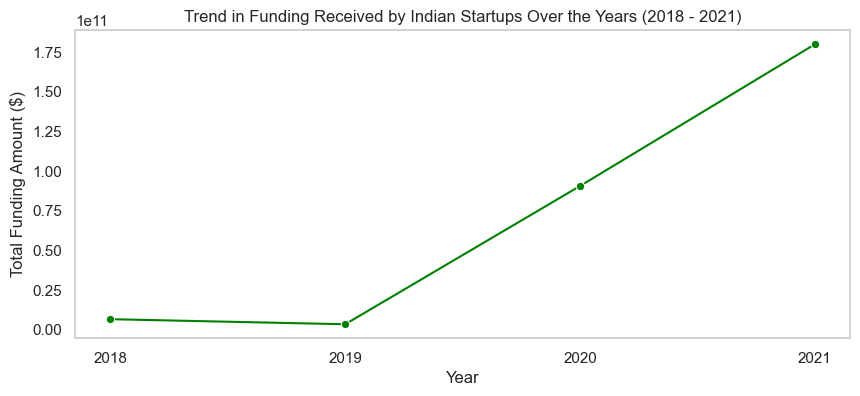

In [235]:
# # Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group the data by year and sum the funding amounts
grouped_data = df.groupby(df['Year'].dt.strftime('%Y'))['Amount ($)'].sum().reset_index()

# Plotting the trend
plt.figure(figsize=(10, 4))
sns.lineplot(x='Year', y='Amount ($)', data=grouped_data, marker='o', color='green')
plt.title("Trend in Funding Received by Indian Startups Over the Years (2018 - 2021)")
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($)')
plt.grid(False)
plt.show()

Insight: "Based on our observations, there has been a consistent upward trend in the amount of funding received by Indian startups since 2019. The increasing trend in fundings over the years suggests a growing and promising Indian startup ecosystem. In light of this insight, ODYSSEY Inc. is positioned to venture into the Indian market, leveraging the positive trajectory of funding in the region."

2.  Which sectors or industries received the highest amount of funding in India from 2018 to 2021?

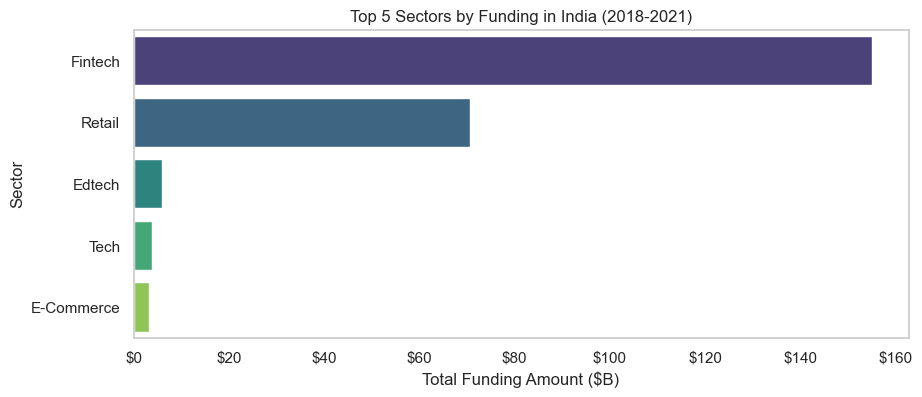

In [226]:
# Filter data for the years 2018 to 2021 using the .isin() function
filtered_data = df[df['Year'].dt.year.isin([2018, 2019, 2020, 2021])]

# Group the data by sector and sum the funding amounts
sector_data = filtered_data.groupby('Sector')['Amount ($)'].sum().reset_index()

# Sort the data by total funding amount in descending order
sector_data = sector_data.sort_values(by='Amount ($)', ascending=False)

# Selecting the top 5 sectors
top_5_sectors = sector_data.head(5)

# Convert 'Amount ($)' to billions with two significant figures
top_5_sectors['Amount ($)'] = top_5_sectors['Amount ($)'] / 1e9  # dividing by 1 billion

# Plotting the sectors with the highest funding
plt.figure(figsize=(10, 4))
sns.barplot(x='Amount ($)', y='Sector', data=top_5_sectors, palette='viridis')
plt.gca().xaxis.set_major_formatter('${x:,.0f}')
plt.title('Top 5 Sectors by Funding in India (2018-2021)')
plt.xlabel('Total Funding Amount ($B)')
plt.ylabel('Sector')
plt.grid(False)
plt.show()


Insight: "Based on our observations, the fintech sector stands out as the predominant recipient of startup funding. Recognizing this trend, ODYSSEY Inc. can leverage this insight by exploring opportunities within the technology industry for startup funding while venturing into the Indian ecosystem."

3.  Do Startups in certain sectors tend to receive more funding than others based on their location

<Figure size 1200x800 with 0 Axes>

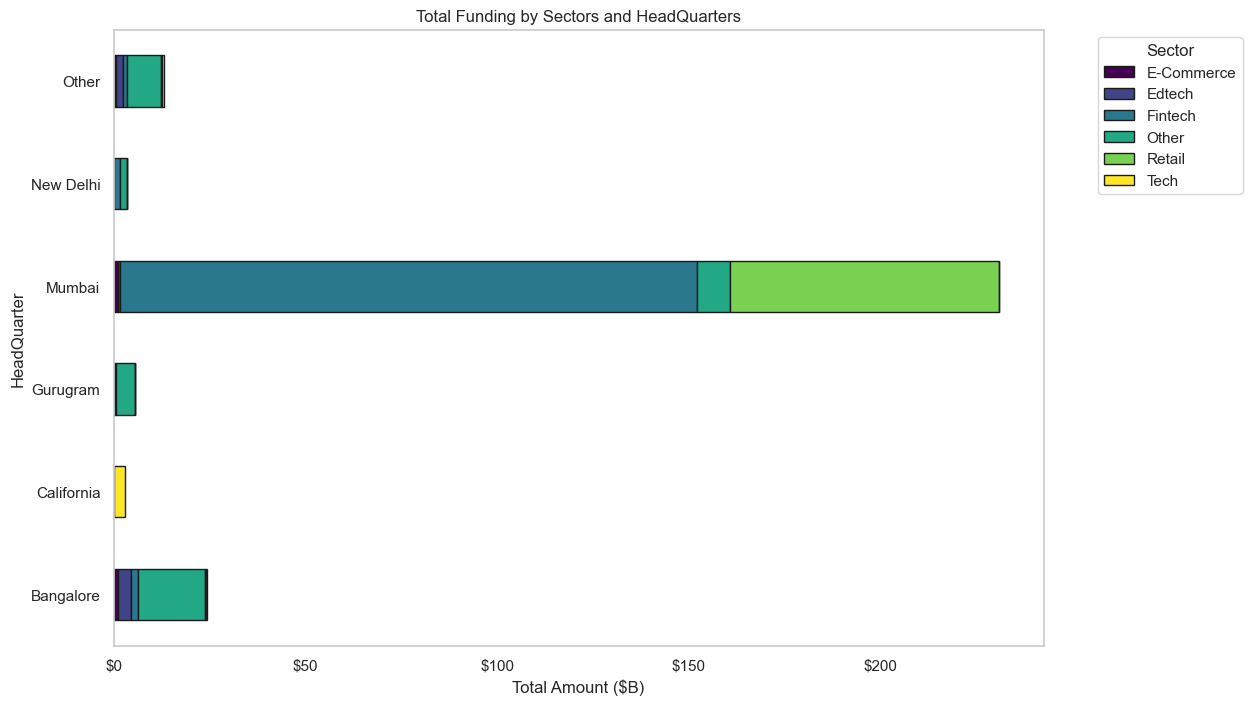

In [227]:
import matplotlib.ticker as mtick

# Group by 'Sector, 'HeadQuarter' and calculate the total funding for each group
# 'agg'function to apply different aggregation functions to different columns.  
grouped_df = df.groupby(['Sector', 'HeadQuarter']).agg({'Amount ($)': 'sum', 'Year': 'first'}).reset_index()
 
# get the top sectors with the highest total funding
top_5 = 5 
top_sectors = grouped_df.groupby('Sector')['Amount ($)'].sum().nlargest(top_5).index
 
# Create a column 'Sector_grouped' to categorize sectors from top sector
grouped_df['Sector_grouped'] = grouped_df['Sector'].apply(lambda x: x if x in top_sectors else 'Other')
 
# the top HeadQuarters with the highest total funding
top_hq = grouped_df.groupby('HeadQuarter')['Amount ($)'].sum().nlargest(top_5).index
 
# Create a new column 'HQ_grouped' to categorize HeadQuarters from top hq
grouped_df['HQ_grouped'] = grouped_df['HeadQuarter'].apply(lambda x: x if x in top_hq else 'Other')
 
# Aggregate data before pivoting
pivot_df = grouped_df.groupby(['HQ_grouped', 'Sector_grouped'])['Amount ($)'].sum().unstack().fillna(0)
 
# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
pivot_df = pivot_df / 1e9
 
# Plotting
plt.figure(figsize=(12, 8))
#sns.set(style="whitegrid")
ax = pivot_df.plot(kind='barh', stacked=True, colormap='viridis', edgecolor='k', figsize=(12, 8))
ax.set_ylabel('HeadQuarter')
ax.set_xlabel('Total Amount ($B)')
ax.set_title('Total Funding by Sectors and HeadQuarters')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.grid(False)
 
#plot legend (sector)
ax.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


4.   What is the total funding amount received by Indian startups in different locations?

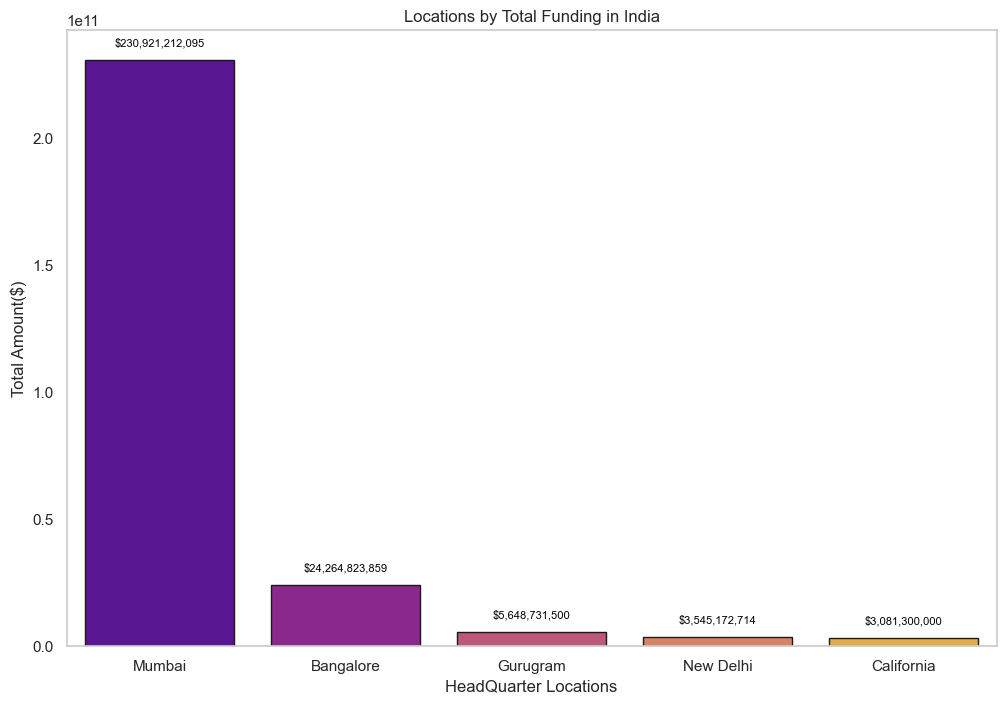

In [228]:
# selecting the top 5 HeadQuarters with the highest total funding
top = 5
top_hq = df.groupby('HeadQuarter')['Amount ($)'].sum().nlargest(top).index
 
# Filter to include only the top locations
df_top_hq = df[df['HeadQuarter'].isin(top_hq)]
 
# Group by 'HeadQuarter' and calculate the total funding for each location
hq_funding = df_top_hq.groupby('HeadQuarter')['Amount ($)'].sum().sort_values(ascending=False).reset_index()
 
# Plotting 
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='HeadQuarter', y='Amount ($)', data=hq_funding, palette='plasma', edgecolor='k')
ax.set_xlabel('HeadQuarter Locations')
ax.set_ylabel('Total Amount($)')
ax.set_title(f'Locations by Total Funding in India')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right') 
ax.grid(False)
 
# Add annotations 
for i, value in enumerate(hq_funding['Amount ($)']):
    formatted_value = "${:,.0f}".format(value)  
    ax.text(i, value + 0.02 * max(hq_funding['Amount ($)']), formatted_value,
            ha='center', va='bottom', color='black', fontsize=8)
 
plt.show()

Insight: Odyssey Inc. has the opportunity to strategically enter the Indian startup scene by focusing on Mumbai, Bangalore, and Gurugram.. Further market research and collaboration exploration will be key to navigating the nuances of each region and making informed entry decisions

5.  What are the top 10 companies with the highest funding?

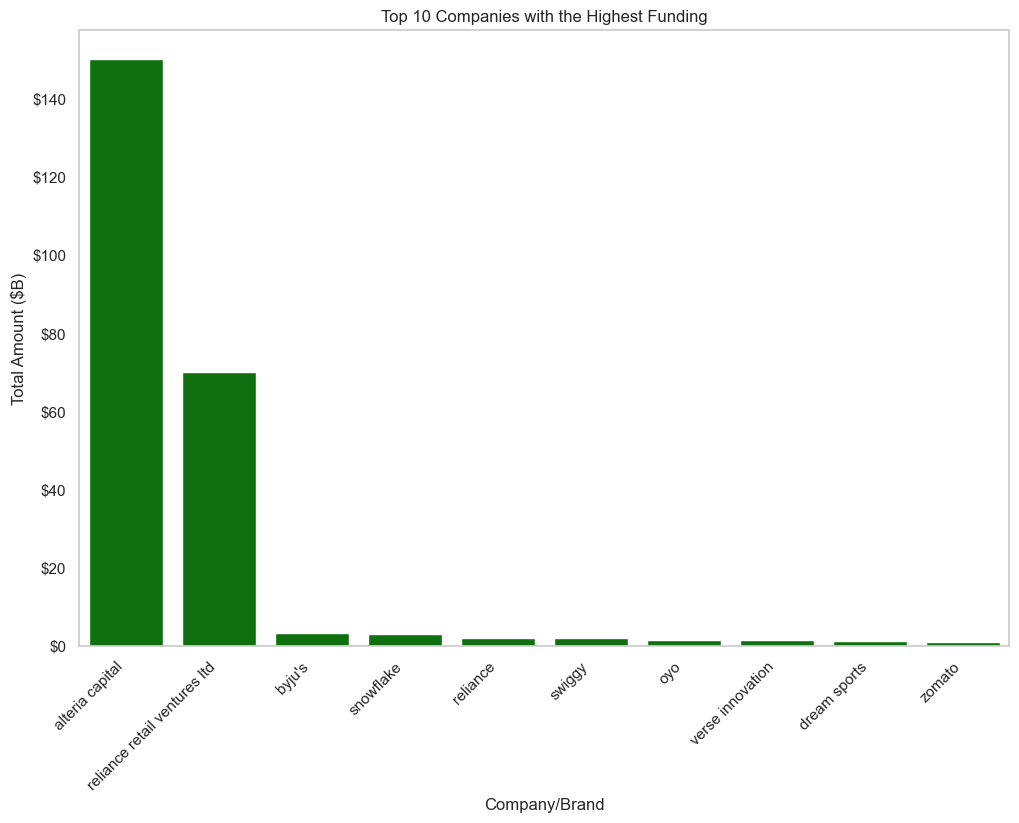

In [229]:
# get top 10 companies with the highest funding
top_10 = 10
top_companies = df.groupby('Company/Brand')['Amount ($)'].sum().nlargest(top_10).index

# Filter to include only the top companies
df_top_companies = df[df['Company/Brand'].isin(top_companies)]

# Group by 'Company/Brand' and calculate the total funding for each company
company_funding = df_top_companies.groupby('Company/Brand')['Amount ($)'].sum().sort_values(ascending=False)

# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
company_funding = company_funding / 1e9

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=company_funding.index, y=company_funding.values, color='green')
plt.xlabel('Company/Brand')
plt.ylabel('Total Amount ($B)')
plt.title('Top 10 Companies with the Highest Funding')
plt.xticks(rotation=45, ha='right')
plt.grid(False)

# Format y-axis ticks with commas and USD
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()


Insight: 'Alteria Capital' claims the top spot as the highest-funded company, followed by 'Reliance Retail Ventures Ltd' securing the second position.
Odyssey Inc. has a substantial opportunity to strategically position itself in the Indian startup landscape, capitalizing on the strengths and diversity of top-funded companies. Navigating partnerships (by establishing strategic alliances with top-funded companies, especially 'Alteria Capital,' to leverage their insights and resources.), understanding market dynamics, and aligning with the evolving ecosystem will be key to a successful entry into the Indian market.

6.  What is the average amount of funds received by Indian startups at different stages of their life cycle?

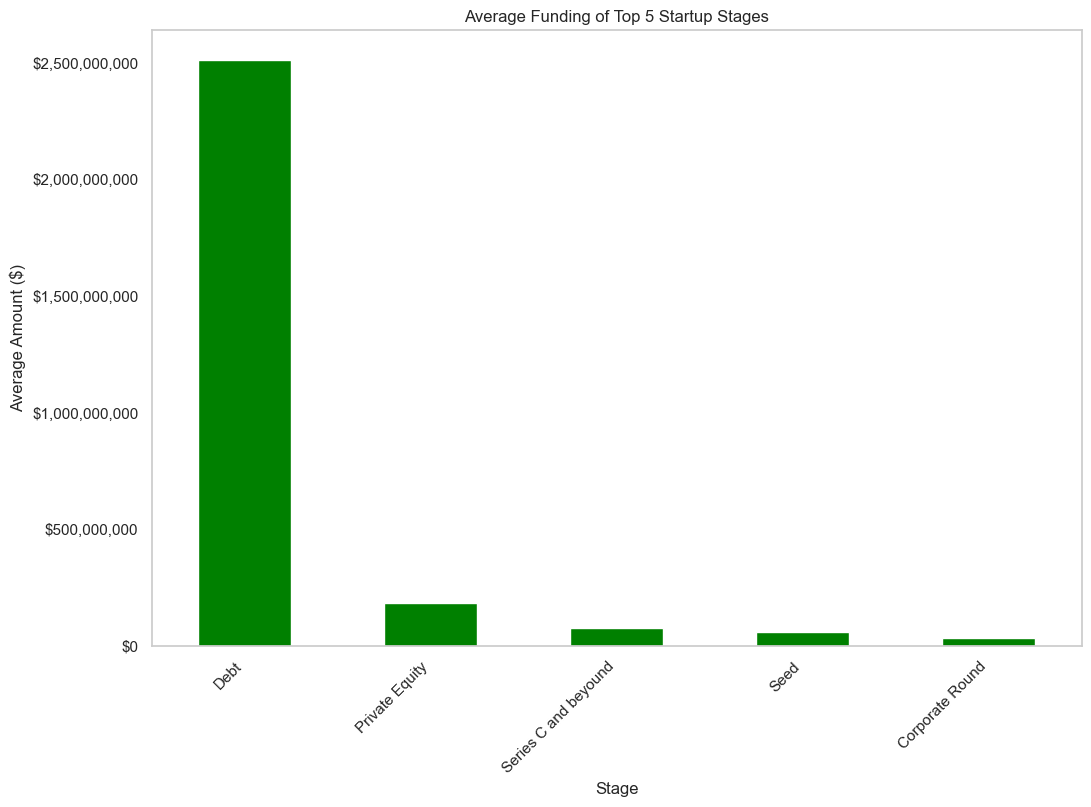

In [236]:
# Setting up our variables
top_5 = 5

# Grouping by 'Stage' and calculating the mean of 'Amount ($)'
top_stage = df.groupby('Stage')['Amount ($)'].mean().nlargest(top_5).index

# Filtering the DataFrame based on the top stages
df_top_stage = df[df['Stage'].isin(top_stage)]

# Calculating the average funding for each stage in the filtered DataFrame
stage_avg_funding = df_top_stage.groupby('Stage')['Amount ($)'].mean().sort_values(ascending=False)

# Plotting the results
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 8))

# Creating a bar plot
ax = stage_avg_funding.plot(kind='bar', color='green')

# Adding labels and title
plt.xlabel('Stage')
plt.ylabel('Average Amount ($)')
plt.title('Average Funding of Top 5 Startup Stages')

# Formatting y-axis ticks to display currency in dollars
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.grid(False)
plt.show()



Insight: 'Debt Financing' emerges as the highest-ranked stage in terms of average funding.
Odyssey Inc. can strategically establish its presence in the Indian startup landscape by tailoring its entry strategy to align with the predominant funding stages. A comprehensive approach involving exploration of debt financing, active engagement with private equity, collaboration with startups across different growth phases, and the consideration of corporate partnerships will be pivotal for a successful and dynamic entry into the Indian startup ecosystem.

7.  What are the startups that received the highest funding each year?

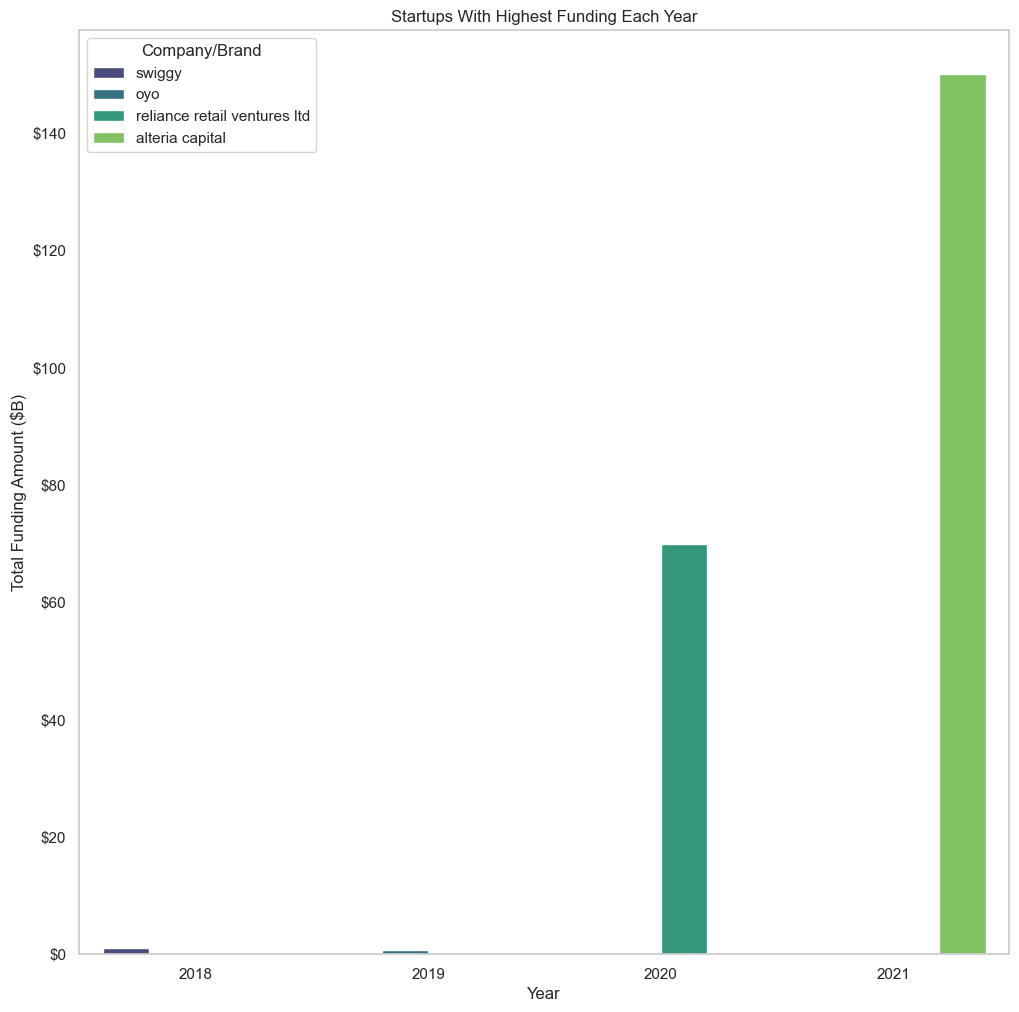

In [231]:
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

# Format 'Year' using strftime
df['Year'] = df['Year'].dt.strftime('%Y')

# Continue with the rest of your code
# Group by Year and get the startup with the highest funding each year
startup_each_year = df.loc[df.groupby('Year')['Amount ($)'].idxmax()]

# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
startup_each_year['Amount ($)'] = startup_each_year['Amount ($)'] / 1e9

# Plotting
plt.figure(figsize=(12, 12))
sns.barplot(x='Year', y='Amount ($)', hue='Company/Brand', data=startup_each_year, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($B)')
plt.title('Startups With Highest Funding Each Year')
plt.grid(False)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

plt.show()


Insight: The highest-funded startups each year span diverse sectors, showcasing opportunities in finance ('Alteria Capital', 2021), retail ('Reliance Retail Ventures Ltd', 2020), hospitality ('Oyo', 2019), and food delivery ('Swiggy', 2018). This diversity provides Odyssey Inc. the chance to explore cross-industry opportunities. The identified industry leaders offer valuable insights into trends and success factors. To strategically position itself, Odyssey Inc. can consider collaborations, understand sector-specific dynamics, and tailor its approach based on the successes of industry leaders across different years.

8.  Are there any patterns in the location of a company's headquarters and the amount of funding it receives?

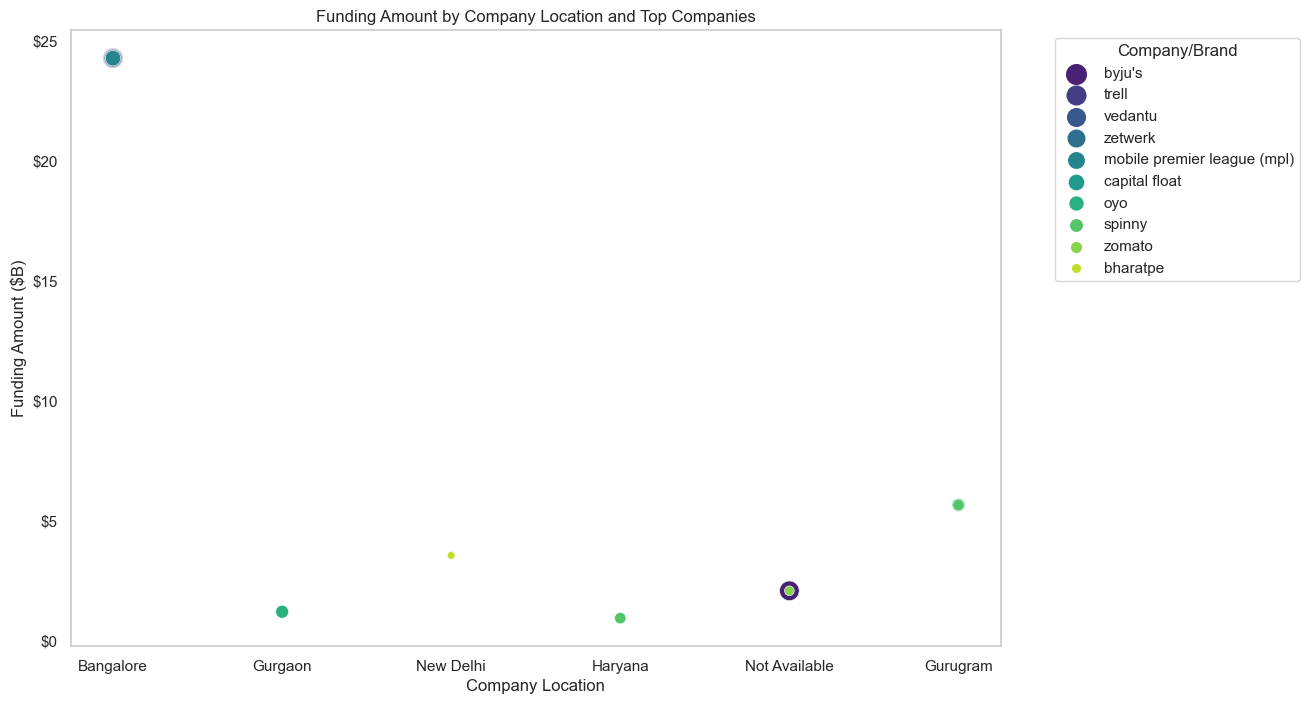

In [232]:
# Group by 'HeadQuarter' and calculate the total funding for each location
hq_funding = df.groupby('HeadQuarter')['Amount ($)'].sum().reset_index()
 
# get the top Company/Brand values based on total funding
top_companies = df['Company/Brand'].value_counts().nlargest(10).index
df_top_companies = df[df['Company/Brand'].isin(top_companies)]
 
# Keep only the top hq based on total funding
top_hq = hq_funding.nlargest(10, 'Amount ($)')
 
# Merge the top hq back into the original DataFrame
df_top_locations = pd.merge(df, top_hq, on='HeadQuarter', how='inner', suffixes=('_original', '_top'))
 
# filter the top Company/Brand values based on total funding within the top locations
top_companies_in_top_locations = df_top_locations['Company/Brand'].value_counts().nlargest(10).index
df_top_locations_top_companies = df_top_locations[df_top_locations['Company/Brand'].isin(top_companies_in_top_locations)]
 
# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
df_top_locations_top_companies['Amount ($)_top'] = df_top_locations_top_companies['Amount ($)_top'] / 1e9  
 
# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='HeadQuarter', y='Amount ($)_top', hue='Company/Brand', data=df_top_locations_top_companies, palette='viridis', size='Company/Brand', sizes=(30, 200))
 
plt.xlabel('Company Location')
plt.ylabel('Funding Amount ($B)')
plt.title('Funding Amount by Company Location and Top Companies')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.grid(False)
plt.legend(title='Company/Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
 
plt.show()






# Hypothesis Testing (T-Test)

In [177]:
# From the visualization of the top 5 HeadQuarter locations of startups in India, Mumbai is the top location receiving funding in the Indian ecosystem from 2018 to 2021,
# with a total funding of $230.92B. Bangalore is the second-highest funded location, with $24.26B in funding.
# Other top-funded headquarter locations include Gurugram ($5.65B), New Delhi (#3.55B), and California ($3.08B).
 
# Group Amount based on HeadQuarter
Mumbai_group = df[df['HeadQuarter'] == 'Mumbai']['Amount ($)']
Other_group = df[df['HeadQuarter'].isin(['Bangalore', 'Gurugram', 'New Delhi', 'California'])]['Amount ($)']

# Using T-test
t_stats, p_value = stats.ttest_ind(Mumbai_group, Other_group)
print("p-value:", p_value)
print("t_stats:", t_stats)

if p_value < 0.05:
    print('Reject null hypothesis: Receiving more funds is dependent on location.')
else:
    print('We do not have enough evidence to reject the null hypothesis.')



p-value: 0.02525044576503865
t_stats: 2.2394239705970556
Reject null hypothesis: Receiving more funds is dependent on location.


# Conclusion

* There is sufficient statistical evidence to reject the null hypothesis, indicating that the observed difference in funding amounts is unlikely to have occurred by random chance alone. Thus, receiving more funds is dependent on location, specifically whether startups in India are located in Mumbai or other specified locations. The analysis suggests a significant difference in the amount of funding received, with Mumbai-based startups appearing to receive significantly more funding compared to startups in other specified locations.

## Recommendations
Following the insights drawn from the statistical analysis. Below are recommendations for ODYSSEY Inc. entering the Indian startup ecosystem:


1. Strategic Location Choice:
* Consider establishing a presence or focusing activities in Mumbai, as it is identified as a top location for funding. The favorable funding environment makes it a strategic choice for startup operations.

2. Network and Ecosystem Engagement:
* Establish and nurture relationships within the Mumbai startup ecosystem. Engage with local investors, mentors, and other startups to build a strong network. Networking is crucial for gaining visibility and accessing funding opportunities.

3. Funding Strategies:
* Develop funding strategies that align with the observed patterns in Mumbai. Understand the preferences of investors in the region and tailor funding pitches accordingly. This targeted approach increases the likelihood of securing funding.

4. Collaboration and Partnerships:
* Explore collaboration opportunities with other startups, incubators, and accelerators in Mumbai. Building partnerships can provide additional support and resources, fostering a collaborative environment for growth.

5. Continuous Monitoring:
* Stay informed about changes in funding trends, emerging technologies, and market dynamics in Mumbai. The dynamic nature of the startup ecosystem requires continuous monitoring to adapt strategies and stay competitive.

6. Diversification Considerations:
* While Mumbai is promising, ODYSSEY Inc. should evaluate the potential of other locations, keeping an eye on emerging startup hubs and assess their suitability for its goals. These diversification considerations will provide flexibility and options for expansion.